In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
from matplotlib import style
import os 
os.chdir(os.path.dirname(os.getcwd()))
import pandas as pd
import pickle as pkl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
style.use('ggplot')
%matplotlib inline
import numpy as np

In [8]:
data = pkl.load(open('data/output/Multi_eval.pkl', "rb"))

In [9]:
data['Total Load'] = data['Total Load']*1000
data['Base Loads 1'] = data['Base Loads 1']*1000
data['Base Loads 2'] = data['Base Loads 2']*1000
data['Base Loads'] = data['Base Loads 1'] + data['Base Loads 2']

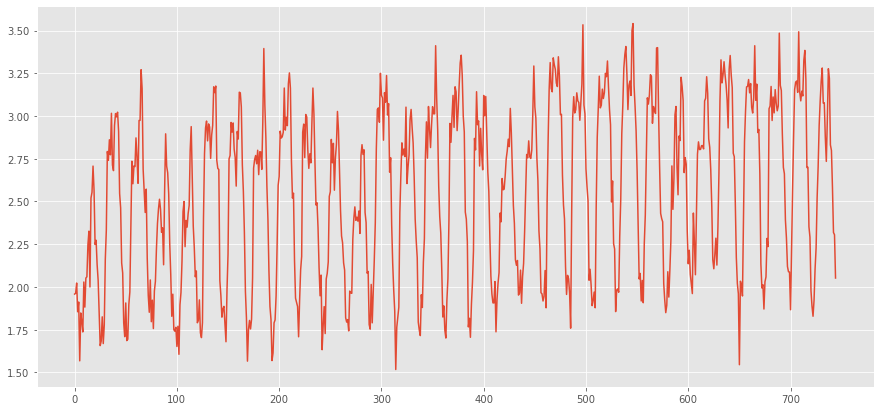

In [10]:
f, ax = plt.subplots(figsize=(15,7))
data['Base Loads'].plot()

In [11]:
data

,Inside Temperatures 1,Inside Temperatures 2,Base Loads 1,Base Loads 2,Ambient Temperatures,Actions,Rewards,Total Load,Base Loads
0,21.000000,21.000000,1.078587,0.879607,2.118,0.0,0.000000,2.085348,1.958194
1,19.275664,19.275664,0.938267,1.025021,2.118,0.0,-0.010427,2.085348,1.963288
2,20.360825,20.360825,0.978649,1.044250,2.147,0.0,-0.254153,5.963288,2.022899
3,18.713671,18.713671,0.841227,1.013634,2.324,0.0,-0.010114,2.022899,1.854862
4,19.879680,19.879680,1.002556,0.909086,2.344,0.0,-0.815603,5.854862,1.911642
...,...,...,...,...,...,...,...,...,...
740,18.407809,18.407809,1.353350,1.445391,-2.605,0.0,-1.625170,6.830997,2.798741
741,18.840547,18.840547,1.356878,1.226002,-2.735,0.0,-1.127178,6.798741,2.582880
742,19.230020,19.230020,1.132027,1.186529,-2.760,0.0,-0.692367,6.582880,2.318556
743,19.590820,19.590820,1.193113,1.112178,-2.714,0.0,-0.301573,6.318556,2.305291


In [12]:
data['Rewards'].sum()

-502.4928241010148

In [14]:
PRICE_SET = [10,20,30,40,50,60]
def extract_price(x):
    return PRICE_SET[int(x)]
data['Chosen Price'] = data['Actions'].map(lambda x: extract_price(x))

In [22]:
one_week = data.iloc[:7*25,:]

<ipython-input-25-051f56545273>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_week['Double Base'] = one_week['Base Loads']*2


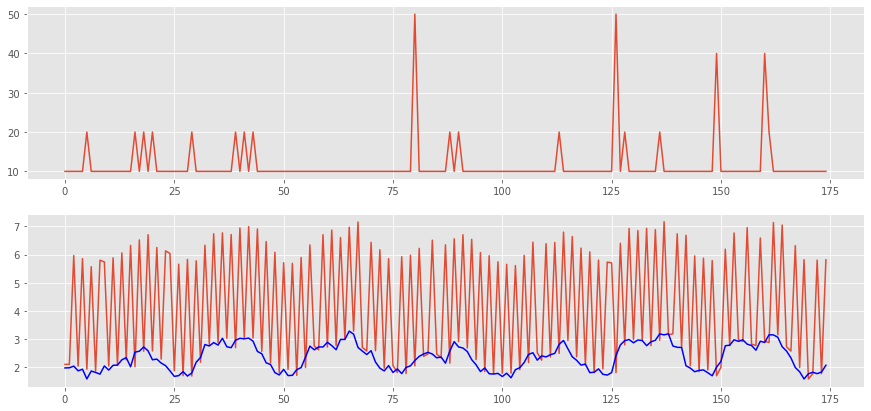

In [25]:
f, ax = plt.subplots(2,1,figsize=(15,7))
one_week['Chosen Price'].plot(ax=ax[0])
one_week['Total Load'].plot(ax=ax[1])
one_week['Double Base'] = one_week['Base Loads']*2
one_week['Base Loads'].plot(ax=ax[1],c='b')

In [16]:
sum(data['Total Load'] >= 6.6)

233

In [17]:
data_base = pkl.load(open('data/output/Multibase_eval.pkl', "rb"))

In [18]:
data_base['Total Load'] = data_base['Total Load']*1000
data_base['Base Loads 1'] = data_base['Base Loads 1']*1000
data_base['Base Loads 2'] = data_base['Base Loads 2']*1000
data_base['Base Loads'] = data_base['Base Loads 1'] + data['Base Loads 2']

In [19]:
data_base['Rewards'].sum()

-500.7535135408883

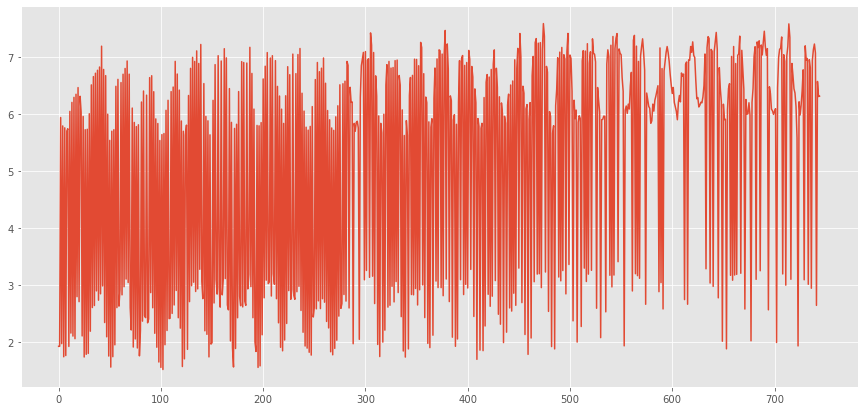

In [46]:
f, ax = plt.subplots(figsize=(15,7))
data_base['Total Load'].plot(ax=ax)

In [20]:
sum(data_base['Total Load'] >= 6.6)

237

In [5]:
data = pkl.load(open('data/output/8764515_dynamic_True_rewards_dqn.pkl', "rb"))

In [6]:
data[-1]

{'NUM_EPISODES': 1000,
 'EPSILON': 1,
 'EPS_DECAY': 0.99997,
 'LEARNING_RATE_': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 3600,
 'NUM_HOURS': 744,
 'COMFORT_PENALTY': 1}

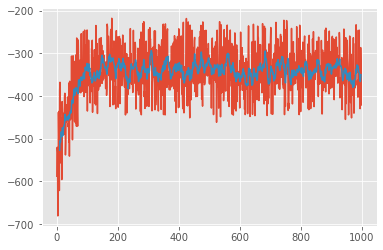

In [7]:
plt.figure()
plt.plot(data[:-1])
rewards_df = pd.DataFrame()
rewards_df['reward'] = data[:-1]
moving_avg = rewards_df[:-1].rolling(window=10).mean()
plt.plot(moving_avg)

In [18]:
data_rms = pkl.load(open('data/output/8667145_dynamic_True_rewards_dqn.pkl', "rb"))

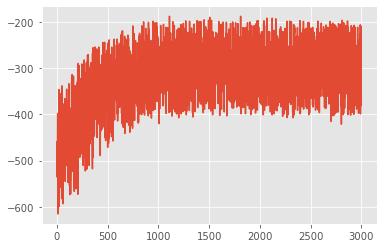

In [19]:
plt.figure()
plt.plot(data_rms[:-1])